## This notebooks inverts the elevation-change anomaly around a subglacial lake 
## (given the ice-flow parameters obtained from ISSM)

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
sys.path.insert(0, '../source')
sys.path.insert(0, '../scripts')

In [2]:
import metavars
metavars.lake_name = 'MercerSubglacialLake'        # set to 'synth' or one of the lakes in the inventory
lake_name = metavars.lake_name

In [3]:
if os.path.isdir('../results/')==False:
    os.mkdir('../results/')

Next we will run the inversion.

In [4]:
# example script that runs the inversion
from inversion import invert
import numpy as np
from print_params import print_params

Print the auxiliary parameters (ice thickness, basal drag, viscosity, velocities):

In [5]:
# print the auxiliary model parameters
print_params()

auxiliary model parameters:
H = 1006 m
beta = 2.8e+09 Pa s m^-1
eta = 4.9e+14 Pa s
u = 170.22415374811808 m yr^-1
v = -64.73407378328018 m yr^-1
relaxation time = 3.455830178532809 yr


nondimensonal parameters:
lambda = 0.2894
gamma = 0.0028


Invert the data:

In [6]:
from params import data_dir

# load elevation data (h_obs)
h_obs = np.load(data_dir+'/h_obs.npy')

# set regularization parameter
eps = 1e0

# set reference time to define elevation anomaly
t_ref = 1.3 # set t_ref = 1.3 [yr] for MSL (Mercer Subglacial Lake)
# solve for the basal vertical velocity inversion
w_inv,h_fwd,mis = invert(h_obs,eps=eps,t_ref=t_ref)

Solving normal equations with CG....

CG iter. 510: rel. residual norm = 1.20e-06,  tol = 1.00e-06 
...CG converged!



Plot the results:

(the plotting script can be modified in plot_results.py)

/Users/agstubbl/Desktop/lake-pressures/notebooks/../scripts/plot_results.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  alt_bdry[j,i] = outline.contains(point)


maximum discrepancy = 0.04978802224473138 km^3
err pct = 16.485067647243092\%


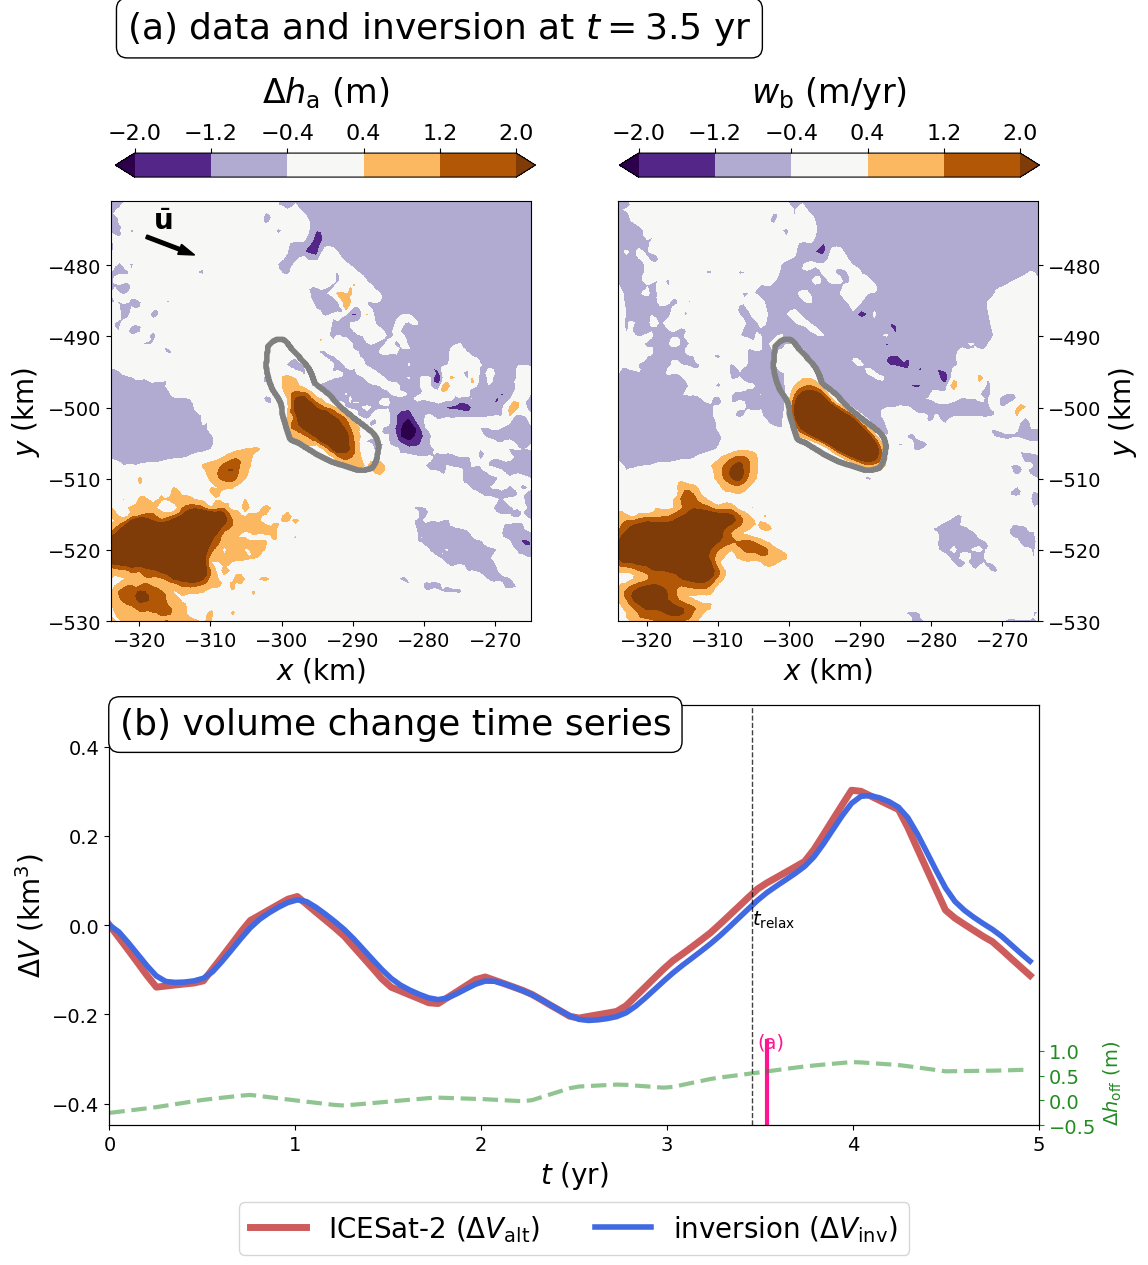

In [7]:
from plot_results import plot
# set the contour plot limits for the elevation and inversion with h_lim and w_lim, resp.
h_lim = 2.0
w_lim = 2.0
#timesteps = range(Nt)   # set timesteps to list with length >1 to make a movie
timesteps = [70]       # set timesteps to list with length == 1 to print single snapshot
plot(t_ref,timesteps=timesteps,h_lim=h_lim,w_lim=w_lim)   